In [1]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
dataset_en_hi = load_dataset("open_subtitles", "en-hi")
dataset_da_ru = load_dataset("open_subtitles", "da-ru")
data_en_hi = dataset_en_hi["train"]
data_da_ru = dataset_da_ru["train"]

In [4]:
data_en_hi[0:2]

{'id': ['0', '1'],
 'meta': [{'year': 1948,
   'imdbId': 40522,
   'subtitleId': {'en': 4180294, 'hi': 4239106},
   'sentenceIds': {'en': [1], 'hi': [1]}},
  {'year': 1948,
   'imdbId': 40522,
   'subtitleId': {'en': 4180294, 'hi': 4239106},
   'sentenceIds': {'en': [2], 'hi': [2]}}],
 'translation': [{'en': 'THE BICYCLE THIEF', 'hi': 'साइकिल चोर'},
  {'en': 'Ricci?', 'hi': 'रिच्ची?'}]}

In [5]:
data_en_hi = data_en_hi[:len(data_en_hi)//4]  # Get the first half of the data

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

english_subtitles = [item['en'] for item in data_en_hi['translation']]
hindi_translations = [item['hi'] for item in data_en_hi['translation']]
merged_subtitles = english_subtitles + hindi_translations
labels = [0] * len(english_subtitles) + [1] * len(hindi_translations)

In [8]:
# Convert text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(merged_subtitles)
y = labels

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
model = SVC(C=1, kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate model performance (e.g., accuracy)
 
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy on testing data: {accuracy:.4f}")

conf_matrix_l1 = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_l1)

Model accuracy on testing data: 0.9756
Confusion Matrix:
[[17835   660]
 [  246 18466]]


In [21]:
model = SVC(C=1, kernel='rbf') 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
 
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy on testing data: {accuracy:.4f}")

conf_matrix_r1 = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix_r1)

Model accuracy on testing data: 0.9726
Confusion Matrix:
[[17776   719]
 [  301 18411]]


In [22]:
model = SVC(C=1, kernel='poly', degree=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

 
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy on testing data: {accuracy:.4f}")

conf_matrix_p1 = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix_p1)

Model accuracy on testing data: 0.9321
Confusion Matrix:
[[16087  2408]
 [  117 18595]]


In [23]:

model = SVC(C=2, kernel='rbf')  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

 
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy on testing data: {accuracy:.4f}")

conf_matrix_r2 = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix_r2)


Model accuracy on testing data: 0.9746
Confusion Matrix:
[[17923   572]
 [  374 18338]]


In [24]:
model = SVC(C=2, kernel='poly', degree=3) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

 
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy on testing data: {accuracy:.4f}")

conf_matrix_p2 = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix_p2)

Model accuracy on testing data: 0.9402
Confusion Matrix:
[[16395  2100]
 [  126 18586]]


In [25]:
model = SVC(C=2, kernel='linear') 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

 
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy on testing data: {accuracy:.4f}")

conf_matrix_l2 = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix_l2)

Model accuracy on testing data: 0.9746
Confusion Matrix:
[[17797   698]
 [  247 18465]]


In [26]:

model = SVC(C=5, kernel='rbf')   
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

 
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy on testing data: {accuracy:.4f}")

conf_matrix_r5 = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix_r5)


Model accuracy on testing data: 0.9732
Confusion Matrix:
[[17909   586]
 [  410 18302]]


In [27]:
model = SVC(C=5, kernel='poly', degree=3)   
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

 
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy on testing data: {accuracy:.4f}")

conf_matrix_p5 = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix_p5)

Model accuracy on testing data: 0.9482
Confusion Matrix:
[[16713  1782]
 [  146 18566]]


In [28]:
model = SVC(C=5, kernel='linear')   
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

 
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy on testing data: {accuracy:.4f}")

conf_matrix_l5 = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix_l5)

Model accuracy on testing data: 0.9740
Confusion Matrix:
[[17777   718]
 [  251 18461]]


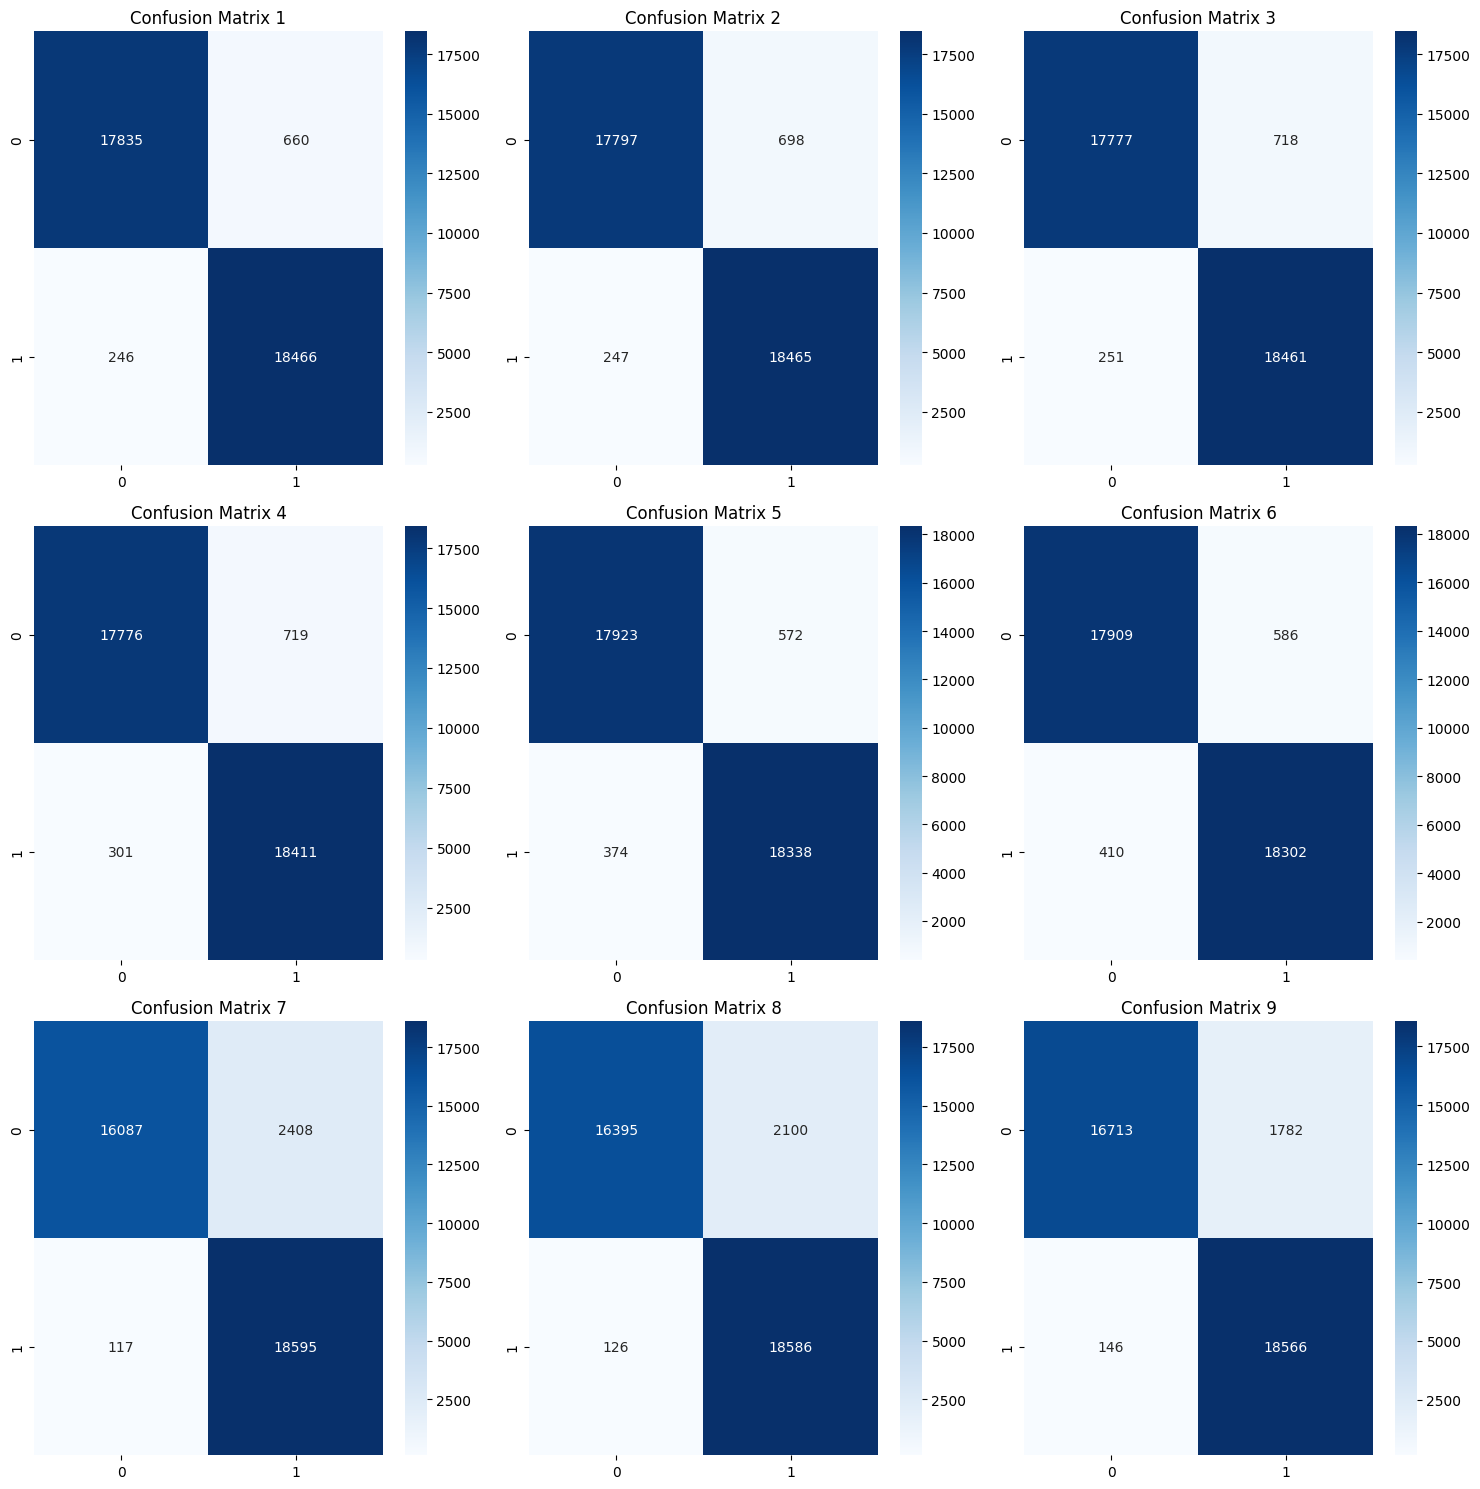

In [30]:


confusion_matrices = [ conf_matrix_l1, conf_matrix_l2, conf_matrix_l5, conf_matrix_r1, conf_matrix_r2, conf_matrix_r5, conf_matrix_p1, conf_matrix_p2, conf_matrix_p5]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

axes = axes.flatten()

for i, cm in enumerate(confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix {i+1}')

plt.tight_layout()
plt.show()
